In [24]:
from redes import *

In [25]:
X, Y, _ = cargarDatos()

Y = one_hot(Y, 4)

num_entradas = X.shape[1]
num_ocultas = 25
num_etiquetas = 10

INIT_EPSILON = 0.12

theta1 = np.random.random((num_ocultas,(num_entradas + 1)))*(2*INIT_EPSILON) - INIT_EPSILON
theta2 = np.random.random((num_etiquetas,(num_ocultas + 1)))*(2*INIT_EPSILON) - INIT_EPSILON

params_rn = np.concatenate((np.ravel(theta1), np.ravel(theta2)))

backprop (params_rn ,num_entradas ,num_ocultas , num_etiquetas , X, Y, 0.1)

(7.257990117875999,
 array([-0.00161674,  0.00201248, -0.00020147, ...,  0.16536656,
         0.15856192,  0.15523014]))

15.542044870697037
19.566706627847232
29.362904606953244
34.226751156019866
38.25997602329166
40.78609350916253
43.94588114403151
15.542044870697037
24.35348518581949
29.75680767254667
34.320945367357425
38.362733344750815
40.71758862818976
43.57766740880288
15.542044870697037
18.958725809213906
27.641719472512417
33.824284980304846
36.67580065079637
41.0686761431752
43.64617228977565
15.542044870697037
18.804589827025175
28.960438431238227
33.84997431066964
37.69481075526631
42.4216475423874
45.86401781126905


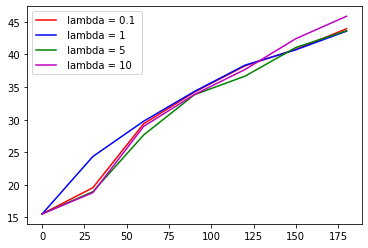

In [23]:
from scipy.optimize import minimize

X, y, _ = cargarDatos()


y_onehot = one_hot(y, 4)


input_size = X.shape[1]
hidden_size = 25
num_labels = 10
iteraciones = np.arange(0,200,30)
lambdas = [0.1, 1 , 5, 10]
colores = ['r', 'b' , 'g', 'm']

INIT_EPSILON = 0.12

theta1 = np.random.random((hidden_size,(input_size + 1)))*(2*INIT_EPSILON) - INIT_EPSILON
theta2 = np.random.random((num_labels,(hidden_size + 1)))*(2*INIT_EPSILON) - INIT_EPSILON

params = np.concatenate((np.ravel(theta1), np.ravel(theta2)))

plt.figure()

i = 0

for reg in lambdas:
    percent = []
    for iters in iteraciones:
        fmin = minimize(fun=backprop, x0=params,
                args=(input_size, hidden_size,
                num_labels, X, y_onehot, reg),
                method='TNC', jac=True,
                options={'maxiter': iters})

        theta1 = np.reshape(fmin.x[:hidden_size*(input_size + 1)],(hidden_size,(input_size + 1)))
        theta2 = np.reshape(fmin.x[hidden_size * (input_size+1):],(num_labels,(hidden_size + 1)))

        p = prueba_neurona(X, y, theta1, theta2)
        print(p)
        percent.append(p)
    plt.plot(iteraciones, percent, c = colores[i] , label = ' lambda = {} '.format(reg))
    i = i+1
    
plt.legend()
plt.savefig('acierto_reg_iter.png')
plt.show()

Esta configuracion no es la mejor de red neuronal pero funciona todo con los datos